#### 타이타닉 생존자 ML 예측 구현 [실습]

- 데이터 전처리(null 처리, 불필요한 속성 제거, 인코딩 수행)
- 모델학습 및 검증/예측/평가

In [3]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests 
import re

from selenium import webdriver

from time    import sleep , time 
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비 
import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml 
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.linear_model     import LogisticRegression


from   sklearn.metrics         import accuracy_score
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler
from   sklearn.impute          import SimpleImputer





sklearn.__version__

'0.24.2'

In [4]:
print('01. 데이터 로드 - ') 
titanic_frm = pd.read_csv('./ml-data/titanic_train.csv')
titanic_frm.head()

01. 데이터 로드 - 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print('02. 결측값 처리 : Age -> 평균 , Cabin Embarked -> N ')
print('missingno 확인 및 처리 - ')
print('SimpleImputer 사용가능 - ')

02. 결측값 처리 : Age -> 평균 , Cabin Embarked -> N 
missingno 확인 및 처리 - 
SimpleInputer 사용가능 - 


<AxesSubplot:>

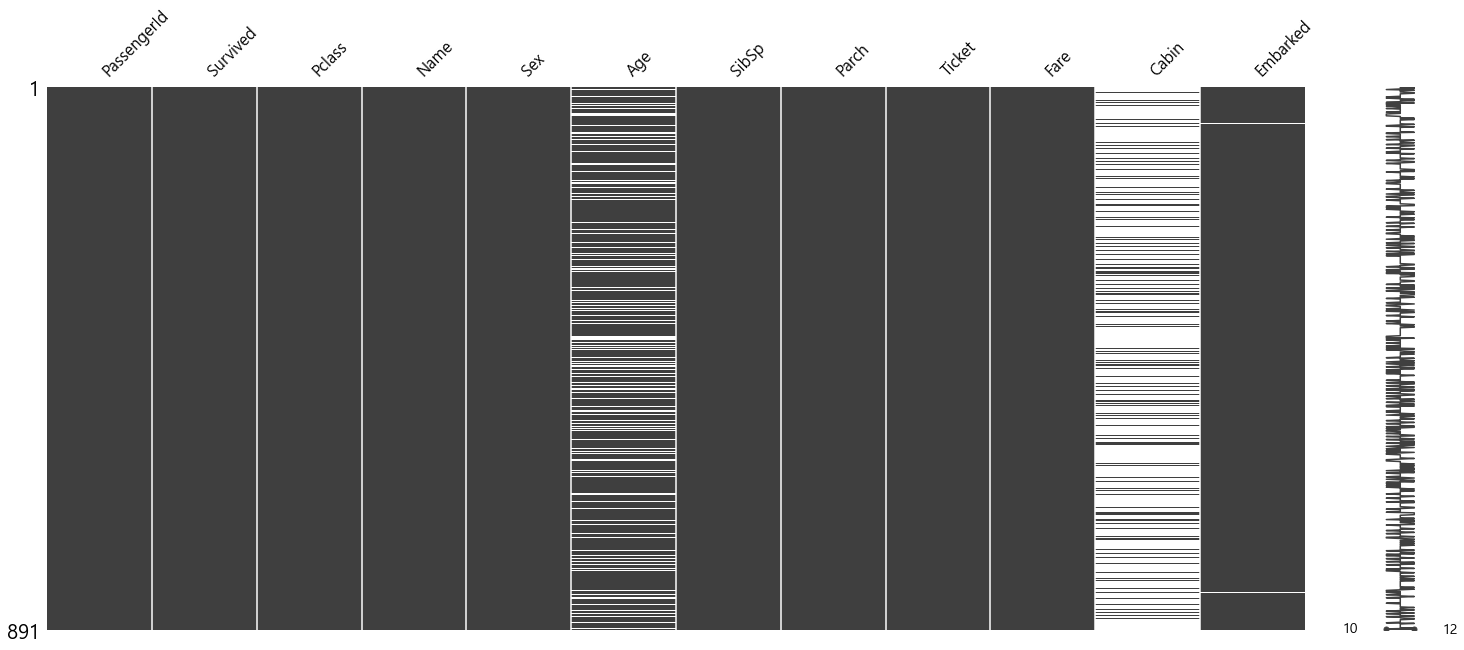

In [7]:
msno.matrix(titanic_frm)

<AxesSubplot:>

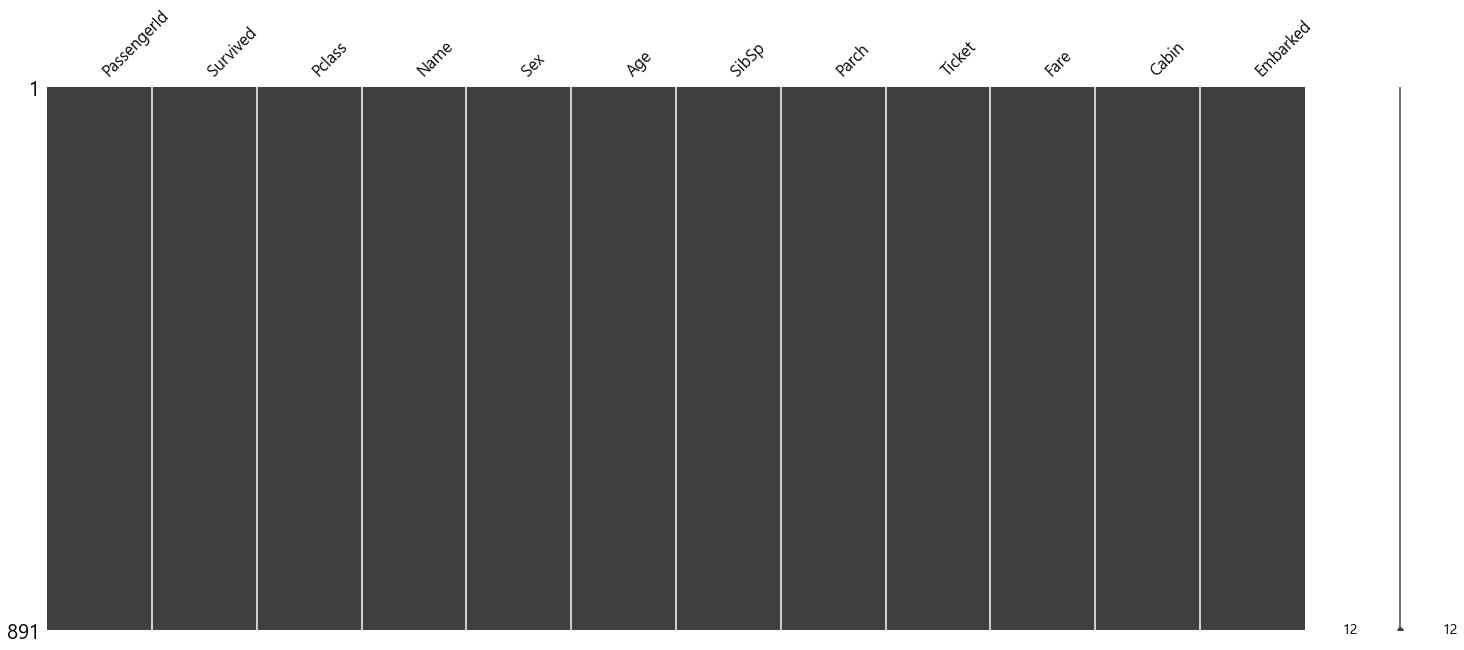

In [8]:
titanic_age_imputer = SimpleImputer(strategy = 'mean')
titanic_frm['Age']  = titanic_age_imputer.fit_transform(titanic_frm[['Age']])


titanic_frm['Cabin']    =  titanic_frm['Cabin'].fillna('N')
titanic_frm['Embarked'] =  titanic_frm['Embarked'].fillna('N')

msno.matrix(titanic_frm)


In [10]:
print('EDA - ')
print('03. 성별에 따른 생존여부 확인을 위한 barplot 시각화(seaborn) - ')
print('성별에따른 시각화 , 성별에 따른 선실별 , 성별에 따른 선실별 그룹과 누적')
print('subplot - (1,3)')

EDA - 
03. 성별에 따른 생존여부 확인을 위한 barplot 시각화(seaborn) - 
성별에따른 시각화 , 성별에 따른 선실별 , 성별에 따른 선실별 그룹과 누적
subplot - (1,3)


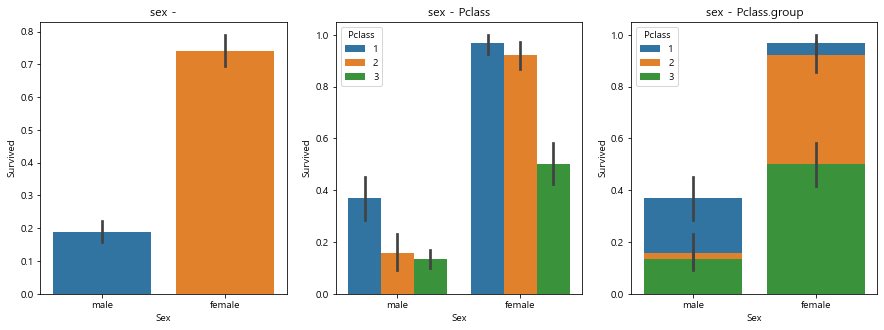

In [11]:
fig = plt.figure( figsize = (15,5))

ax01 = fig.add_subplot(1,3,1)
ax02 = fig.add_subplot(1,3,2)
ax03 = fig.add_subplot(1,3,3)

ax01.set_title('sex -')
ax02.set_title('sex - Pclass')
ax03.set_title('sex - Pclass.group')

sns.barplot(ax = ax01 , data = titanic_frm , x = 'Sex' , y='Survived')
sns.barplot(ax = ax02 , data = titanic_frm , x = 'Sex' , y='Survived', hue = 'Pclass')
sns.barplot(ax = ax03 , data = titanic_frm , x = 'Sex' , y='Survived', hue = 'Pclass' , dodge = False)



plt.show()
plt.close()

In [12]:
print('EDA - ')
print('04. 성별에 따른 생존여부 확인을 위한 countplot , pie 시각화(seaborn) - ')
print('성별에따른 시각화 -')
print('subplot - (1,2)')

EDA - 
04. 성별에 따른 생존여부 확인을 위한 countplot , pie 시각화(seaborn) - 
성별에따른 시각화 -
subplot - (1,2)


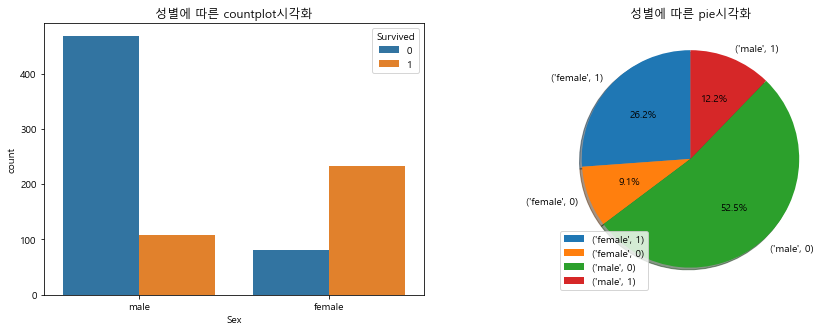

In [20]:
fig= plt.figure(figsize=(15,5))
ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)

sns.countplot(ax=ax01, data=titanic_frm, x='Sex',hue='Survived')

ax02.pie(titanic_frm.groupby('Sex')['Survived'].value_counts(),
         labels     = titanic_frm.groupby('Sex')['Survived'].value_counts().index,
         autopct    = '%1.1f%%',
         startangle = 90 , 
         shadow     = True
        )

ax01.set_title('성별에 따른 countplot시각화')
ax02.set_title('성별에 따른 pie시각화')


plt.legend(loc='best')

plt.show()
plt.close()


In [25]:
print('EDA - ')
print('04. 성별에 따른 생존자 수를 수치로 비교 - groupby ')

titanic_frm.groupby(['Sex' , 'Survived'])['Survived'].count().to_frame()

EDA - 
04. 성별에 따른 생존자 수를 수치로 비교 - groupby 


Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [29]:
print('04. Age , Cabin , Embarked 값의 분포 - value_counts() ')
print()
print('Sex - ')
print(titanic_frm['Sex'].value_counts() )
print()
print('Cabin - ')
print(titanic_frm['Cabin'].value_counts() )
print()
print('Embarked - ')
print(titanic_frm['Embarked'].value_counts() )

04 Age , Cabin , Embarked 값의 분포 - value_counts() 

Sex - 
male      577
female    314
Name: Sex, dtype: int64

Cabin - 
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked - 
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [39]:
print('05. Cabin 첫 번재 글자가 좌석등급을 의미하므로 첫 글자만 추출해서 반영 - ')
titanic_frm['Cabin'] = titanic_frm['Cabin'].str[:1]

05. Cabin 첫 번재 글자가 좌석등급을 의미하므로 첫 글자만 추출해서 반영 - 


In [40]:
print('Cabin - ')
print(titanic_frm['Cabin'].value_counts() )

Cabin - 
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [49]:
print('06. 나이에 따른 연령층 분류해서 새로운 피처(Age_Category)를 추가 - ')
titanic_frm['Age_Category'] = ( (titanic_frm['Age'] // 10) * 10 ).astype(int)

06. 나이에 따른 연령층 분류해서 새로운 피처(Age_Category)를 추가 - 


In [50]:
titanic_frm

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,20
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,30
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,20
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,30
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,20
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,10
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,20
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,20


07. 연령대에 따른 성별 생존 확률 시각화 - barplot 


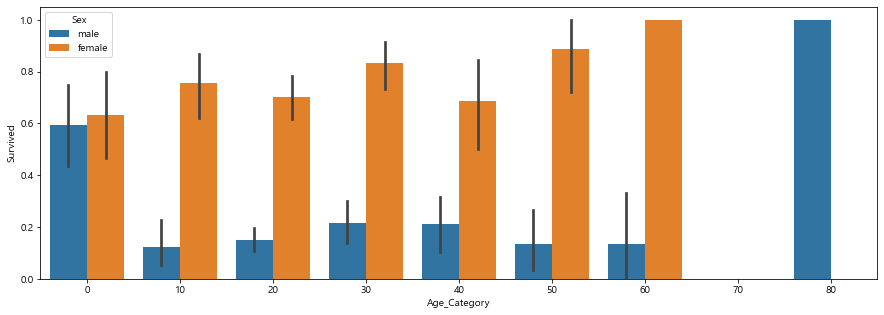

In [53]:
print('07. 연령대에 따른 성별 생존 확률 시각화 - barplot ')

fig= plt.figure(figsize=(15,5))

sns.barplot(data = titanic_frm , 
            x    = 'Age_Category' , 
            y    = 'Survived' , 
            hue  = 'Sex')

plt.show()
plt.close()

In [54]:
titanic_subset_frm = titanic_frm[['Survived' , 'Pclass' , 'Sex' , 'Age_Category' , 'Cabin' , 'Embarked']]
titanic_subset_frm

,Survived,Pclass,Sex,Age_Category,Cabin,Embarked
0,0,3,male,20,N,S
1,1,1,female,30,C,C
2,1,3,female,20,N,S
3,1,1,female,30,C,S
4,0,3,male,30,N,S
...,...,...,...,...,...,...
886,0,2,male,20,N,S
887,1,1,female,10,B,S
888,0,3,female,20,N,S
889,1,1,male,20,C,C


In [58]:
print('08. 전처리 - 레이블인코딩(Sex , Cabin , Embarked)')

def feature_encoder(df) :
    features = ['Sex' , 'Cabin' , 'Embarked']
    
    for f in features :
        le = LabelEncoder()
        le = le.fit(df[f])
        df[f] = le.transform(df[f])
    
    return df 

08. 전처리 - 레이블인코딩(Sex , Cabin , Embarked)


In [62]:
clean_data = feature_encoder(titanic_subset_frm)
clean_data
# clean_data.isnull().sum()

,Survived,Pclass,Sex,Age_Category,Cabin,Embarked
0,0,3,1,20,7,3
1,1,1,0,30,2,0
2,1,3,0,20,7,3
3,1,1,0,30,2,3
4,0,3,1,30,7,3
...,...,...,...,...,...,...
886,0,2,1,20,7,3
887,1,1,0,10,1,3
888,0,3,0,20,7,3
889,1,1,1,20,2,0


#### 학습을 위한 준비
- feature , target 
- Estimator 선정
- 학습, 예측, 평가 
- 교차검증 추가(cross_val_score) , 하이퍼 파라미터 튜닝(GridSearchCV)
- 피처 중요도 확인

In [63]:
titanic_features = titanic_subset_frm.drop(['Survived'] , axis = 1 )
titanic_label    = titanic_subset_frm['Survived']

X_train , X_test , y_train , y_test = train_test_split(titanic_features , 
                                                       titanic_label , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)


In [64]:
dt_model = DecisionTreeClassifier(random_state=11)
rf_model = RandomForestClassifier(random_state=11)
lr_model = LogisticRegression()

In [78]:
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print('dt model accuracy - ' , accuracy_score(y_test , dt_pred))

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print('rf model accuracy - ' , accuracy_score(y_test , rf_pred))

lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print('lr model accuracy - ' , accuracy_score(y_test , lr_pred))

dt model accuracy -  0.7821229050279329
rf model accuracy -  0.7877094972067039
lr model accuracy -  0.8044692737430168


In [81]:
print('dt_model , rf_model , lr_model 교차 검증 - ')
kfold = KFold(n_splits=5)
cv_accuracy = []
n_iter = 0
for train_idx, test_idx in kfold.split(titanic_features):
    label_train = titanic_label.iloc[train_idx]
    label_test = titanic_label.iloc[test_idx]
    features_train =  titanic_features.iloc[train_idx,:-1]
    features_test =  titanic_features.iloc[test_idx,:-1]
    
    lr_model.fit(features_train, label_train)
    fold_pred = dt_model.predict(features_test)
    
    # 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(label_test, fold_pred),4)
    cv_accuracy.append(accuracy)
    print("교차검증 {0} 정확도: {1:.4f}".format(n_iter, accuracy))
    

print('\n평균 검증 정확도 : ', np.mean(cv_accuracy))

dt_model , rf_model , lr_model 교차 검증 - 
교차검증 1 정확도: 0.8268
교차검증 2 정확도: 0.8371
교차검증 3 정확도: 0.8371
교차검증 4 정확도: 0.8258
교차검증 5 정확도: 0.8146

평균 검증 정확도 :  0.82828


In [82]:
print('cross_val_score 를 이용한 교차검증 및 평균정확도 확인')
print()
scoring = cross_val_score(dt_model , titanic_features , titanic_label , scoring='accuracy' , cv=5 )
print('교차 검증별 정확도 :',scoring)
print('평균 검증 정확도 :',np.mean(scoring) )

cross_val_score 를 이용한 교차검증 및 평균정확도 확인

교차 검증별 정확도 : [0.77653631 0.81460674 0.8258427  0.8258427  0.8258427 ]
평균 검증 정확도 : 0.8137342288619672


In [85]:
print('GridSearchCV 교차검증 및 평균 정확도 - ') 

X_train , X_test , y_train , y_test = train_test_split(titanic_features , 
                                                       titanic_label , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)

tree_model = DecisionTreeClassifier(random_state = 100)
params = {
    'criterion' : ['gini' , 'entropy'] , 
    'splitter'  : ['best' , 'random']  ,
    'max_depth' : [1 , 2 , 3 , 4 , 5] , 
    'min_samples_split' : [2 , 3 , 4, 5, 6, 7]
}



GridSearchCV 교차검증 및 평균 정확도 - 


In [86]:
# refit -> 가장 좋은 파라미터 설정으로 재학습 시킴
grid_tree_model = GridSearchCV(tree_model , param_grid = params , cv = 5 , refit = True)
grid_tree_model.fit(X_train , y_train)
grid_tree_model.cv_results_

{'mean_fit_time': array([0.00279961, 0.00219946, 0.00219975, 0.00259995, 0.00199995,
        0.00220075, 0.00240006, 0.00219994, 0.00240059, 0.00220008,
        0.00240045, 0.00260019, 0.00220017, 0.002601  , 0.00280004,
        0.0022016 , 0.0030005 , 0.00259986, 0.00219951, 0.00219994,
        0.00219898, 0.00220013, 0.00200009, 0.00280161, 0.00219989,
        0.00240006, 0.00260048, 0.00240016, 0.00219998, 0.00220022,
        0.00219951, 0.00280042, 0.00200005, 0.00200109, 0.00240021,
        0.00219936, 0.00220013, 0.00259995, 0.00180035, 0.00220027,
        0.00220098, 0.00220065, 0.00200052, 0.00280051, 0.00239987,
        0.00240064, 0.00220013, 0.00219941, 0.00199389, 0.00279994,
        0.00239997, 0.00239954, 0.00300064, 0.00240064, 0.00239959,
        0.00199952, 0.00260067, 0.00200024, 0.00279951, 0.00260038,
        0.0024003 , 0.00200071, 0.00260057, 0.00240021, 0.00219979,
        0.00200071, 0.00259986, 0.0017992 , 0.00219951, 0.002599  ,
        0.00220017, 0.00219965,

In [89]:
score_titanic_frm = pd.DataFrame(grid_tree_model.cv_results_)
score_titanic_frm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003399,0.000801,0.001800,4.011650e-04,gini,1,2,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.762238,0.797203,0.788732,0.809859,0.774648,0.786536,0.016699,61
1,0.002400,0.000489,0.001600,4.896294e-04,gini,1,2,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.762238,0.797203,0.788732,0.809859,0.774648,0.786536,0.016699,61
2,0.002798,0.000401,0.002001,6.339940e-04,gini,1,3,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.762238,0.797203,0.788732,0.809859,0.774648,0.786536,0.016699,61
3,0.003201,0.000402,0.001199,3.981132e-04,gini,1,3,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.762238,0.797203,0.788732,0.809859,0.774648,0.786536,0.016699,61
4,0.002400,0.000490,0.001801,4.003064e-04,gini,1,4,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.762238,0.797203,0.788732,0.809859,0.774648,0.786536,0.016699,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.002201,0.000400,0.001200,4.000427e-04,entropy,5,5,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.797203,0.832168,0.852113,0.809859,0.711268,0.800522,0.048431,53
116,0.002401,0.000491,0.001400,4.902713e-04,entropy,5,6,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.783217,0.839161,0.859155,0.866197,0.746479,0.818842,0.046446,19
117,0.002599,0.000489,0.001000,8.313940e-07,entropy,5,6,random,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.790210,0.832168,0.852113,0.809859,0.711268,0.799123,0.048607,54
118,0.002201,0.000400,0.001399,4.895318e-04,entropy,5,7,best,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.783217,0.839161,0.859155,0.866197,0.746479,0.818842,0.046446,19


In [94]:
estimator = grid_tree_model.best_estimator_
estimator_pred = estimator.predict(X_test)
print('answer - ' , y_test.values)
print()
print('pred   - ' , estimator_pred)
print()
print('테스트 정확도 : ' , accuracy_score(y_test , estimator_pred))

answer -  [0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1
 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1
 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0]

pred   -  [0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1]

테스트 정확도 :  0.8212290502793296


<AxesSubplot:>

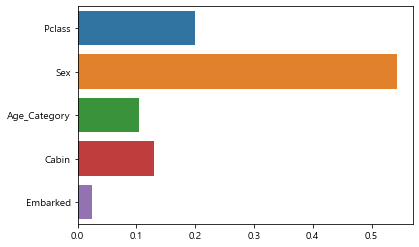

In [95]:
sns.barplot(x = estimator.feature_importances_ , y = titanic_features.columns )